<a href="https://colab.research.google.com/github/aaakash06/PRODIGY_ML_4/blob/main/handgesturerecognization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
! mkdir ~/.kaggle

In [3]:
 ! pip install -q kaggle

In [4]:
! cp kaggle.json ~/.kaggle/

In [5]:
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
! kaggle datasets list

ref                                                            title                                            size  lastUpdated          downloadCount  voteCount  usabilityRating  
-------------------------------------------------------------  ----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
muhammadehsan000/healthcare-dataset-2019-2024                  Healthcare Dataset (2019-2024)                    3MB  2024-08-09 17:52:25           3495         79  1.0              
berkayalan/paris-2024-olympics-medals                          Paris 2024 Olympics Medals                        1KB  2024-08-14 11:02:45           1462         35  1.0              
souradippal/student-performance-prediction                     Student Performance Prediction                  381KB  2024-08-16 15:59:38            668         24  1.0              
arpit2712/amazonsalesreport                                    AmazonSalesReport     

In [7]:
! kaggle download dataset gti-upm/leapgestrecog

usage: kaggle [-h] [-v] [-W] {competitions,c,datasets,d,kernels,k,models,m,files,f,config} ...
kaggle: error: argument command: invalid choice: 'download' (choose from 'competitions', 'c', 'datasets', 'd', 'kernels', 'k', 'models', 'm', 'files', 'f', 'config')


In [8]:
! kaggle datasets download gti-upm/leapgestrecog

Dataset URL: https://www.kaggle.com/datasets/gti-upm/leapgestrecog
License(s): CC-BY-NC-SA-4.0
 99% 2.10G/2.13G [00:32<00:00, 75.7MB/s]
100% 2.13G/2.13G [00:32<00:00, 69.4MB/s]


In [10]:
import zipfile
zip_ref = zipfile.ZipFile('/content/leapgestrecog.zip', 'r')
zip_ref.extractall('/content/dataset')
zip_ref.close()

In [1]:
import os
def walk_through_dir(dir_path):
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")


In [2]:
walk_through_dir('/content/dataset')

There are 3 directories and 0 images in '/content/dataset'.
There are 10 directories and 0 images in '/content/dataset/train'.
There are 10 directories and 0 images in '/content/dataset/train/06'.
There are 0 directories and 200 images in '/content/dataset/train/06/06_index'.
There are 0 directories and 200 images in '/content/dataset/train/06/09_c'.
There are 0 directories and 200 images in '/content/dataset/train/06/08_palm_moved'.
There are 0 directories and 200 images in '/content/dataset/train/06/10_down'.
There are 0 directories and 200 images in '/content/dataset/train/06/04_fist_moved'.
There are 0 directories and 200 images in '/content/dataset/train/06/03_fist'.
There are 0 directories and 200 images in '/content/dataset/train/06/01_palm'.
There are 0 directories and 200 images in '/content/dataset/train/06/07_ok'.
There are 0 directories and 200 images in '/content/dataset/train/06/02_l'.
There are 0 directories and 200 images in '/content/dataset/train/06/05_thumb'.
There a

In [3]:
CATEGORIES = os.listdir("/content/dataset/train/00")

In [4]:
CATEGORIES.sort()
print(CATEGORIES)

['01_palm', '02_l', '03_fist', '04_fist_moved', '05_thumb', '06_index', '07_ok', '08_palm_moved', '09_c', '10_down']


In [5]:
IMG_SIZE = 50
import cv2
import numpy as np
# Loading the images and their class(0 - 9)
image_data = []
data_path = "/content/dataset/train"
for dr in os.listdir(data_path):
    for class_index,category in enumerate(CATEGORIES):
        path = os.path.join(data_path, dr, category)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                image_data.append([cv2.resize(img_arr, (IMG_SIZE, IMG_SIZE)), class_index])
            except Exception as e:
                pass
image_data[0]

[array([[7, 5, 5, ..., 4, 3, 4],
        [4, 4, 5, ..., 4, 4, 4],
        [4, 5, 5, ..., 4, 5, 4],
        ...,
        [4, 4, 4, ..., 4, 4, 4],
        [3, 5, 4, ..., 4, 3, 4],
        [4, 4, 4, ..., 3, 4, 3]], dtype=uint8),
 0]

In [6]:
# shuffle the input data
import random
random.shuffle(image_data)

In [7]:
input_data = []
label = []
for X, y in image_data:
    input_data.append(X)
    label.append(y)

In [8]:
label[:10]

[7, 1, 7, 4, 6, 7, 3, 9, 4, 3]

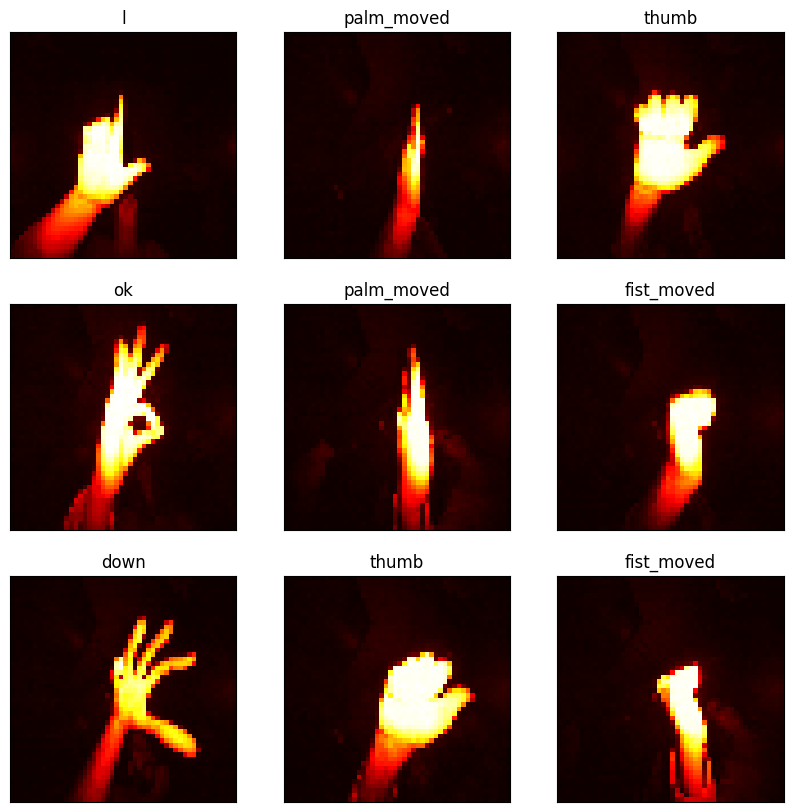

In [9]:
import matplotlib.pyplot as plt
plt.figure(1, figsize=(10,10))
for i in range(1,10):
    plt.subplot(3,3,i)
    plt.imshow(image_data[i][0], cmap='hot')
    plt.xticks([])
    plt.yticks([])
    plt.title(CATEGORIES[label[i]][3:])
plt.show()

In [10]:
# Normalizing the data
input_data = np.array(input_data)
label = np.array(label)
input_data = input_data/255.0
input_data.shape

(20000, 50, 50)

In [11]:
import keras
# one hot encoding
label = keras.utils.to_categorical(label, num_classes=10)
label[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [12]:
# reshaping the data
input_data.shape = (-1, IMG_SIZE, IMG_SIZE, 1)

In [21]:
# splitting the input_data to train and val data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(input_data, label, test_size = 0.3, random_state=0)

**Model**

In [16]:
!pip install keras

In [18]:
# Import of keras model and hidden layers for our convolutional network
from keras.layers import Conv2D, Activation, MaxPool2D, Dense, Flatten, Dropout

model = keras.models.Sequential()

model.add(Conv2D(filters = 32, kernel_size = (3,3), input_shape = (IMG_SIZE, IMG_SIZE, 1)))
model.add(Activation('relu'))


model.add(Conv2D(filters = 32, kernel_size = (3,3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(filters = 64, kernel_size = (3,3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer = 'rmsprop',
             metrics = ['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [28]:
model.fit(X_train, y_train, epochs = 7, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/7
438/438 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 1.0000 - loss: 2.1233e-04 - val_accuracy: 1.0000 - val_loss: 3.4783e-05
Epoch 2/7
438/438 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9998 - loss: 6.7809e-04 - val_accuracy: 1.0000 - val_loss: 6.0221e-05
Epoch 3/7
438/438 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 1.0000 - loss: 9.0249e-05 - val_accuracy: 0.9998 - val_loss: 0.0010
Epoch 4/7
438/438 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9997 - loss: 6.4866e-04 - val_accuracy: 0.9998 - val_loss: 2.1908e-04
Epoch 5/7
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 1.0000 - loss: 4.3294e-04 - val_accuracy: 0.9998 - val_loss: 0.0014
Epoch 6/7
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9996 - loss: 9.5937e-04 - val_accuracy: 0.9997 - val_loss: 0.0023
Epoch 7/7
438/438 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9989 - loss: 0.0036 - val_accuracy: 0.9998 - val_loss: 6.2183e-04


In [23]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 48, 48, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 48, 48, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 46, 46, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 46, 46, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 23, 23, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 23, 23, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 21, 21, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 21, 21, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6400)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       1,638,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,338,582 (12.74 MB)

 Trainable params: 1,669,290 (6.37 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,669,292 (6.37 MB)

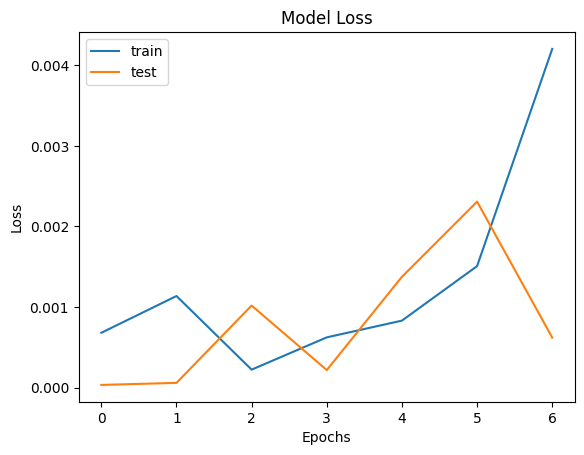

In [31]:
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

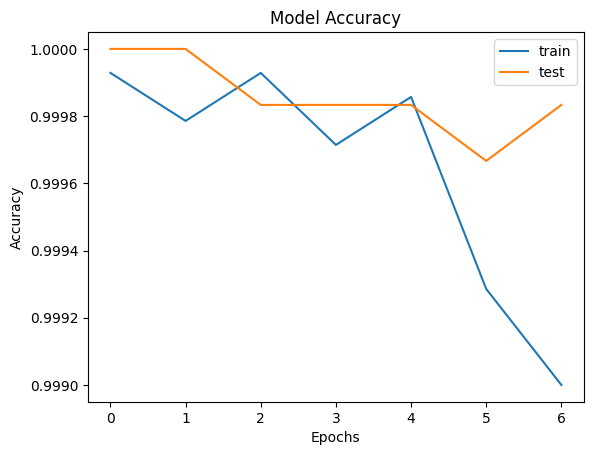

In [30]:
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [32]:
#calculate loss and accuracy on test data

test_loss, test_accuracy = model.evaluate(X_test, y_test)

print('Test accuracy: {:2.2f}%'.format(test_accuracy*100))

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9997 - loss: 0.0011
Test accuracy: 99.98%


188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


[]

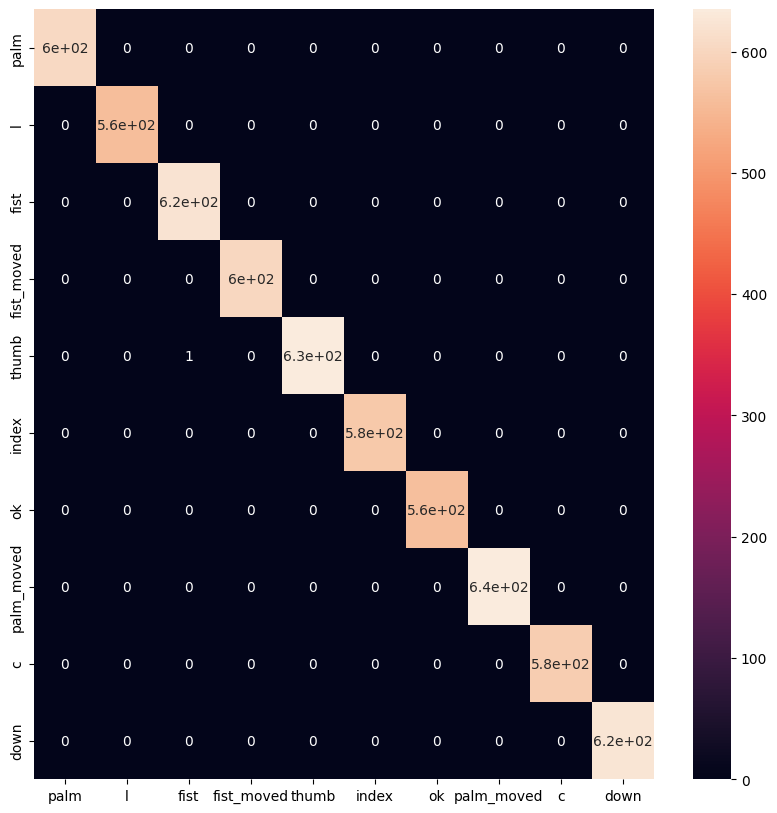

In [33]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
cat = [c[3:] for c in CATEGORIES]
plt.figure(figsize=(10,10))
cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(model.predict(X_test), axis=1))
sn.heatmap(cm, annot=True,xticklabels=cat, yticklabels=cat)
plt.plot()